# 라이브러리 Import 및 데이터 Read

In [2]:
import pandas as pd
import os

In [3]:
# 경로 설정
os.chdir(r'C:\Users\user\Python_study\data')

In [4]:
# 분석 데이터 Read
iris = pd.read_csv("IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# 타겟 변수의 구성 확인
iris['species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
# 아이디 생성
iris['id'] = range(len(iris))

In [7]:
# 열의 순서 변경
iris = iris[['id','sepal_length','sepal_width','petal_length','petal_width','species']]
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# iris 중에서 100개를 랜덤으로 추출해 train 데이터로 지정
train = iris.sample(100,replace=False,random_state=2020).reset_index().drop(['index'],axis=1)

In [9]:
# 추출되지 않은 나머지를 test 데이터로 지정
test = iris.loc[ ~iris['id'].isin(train['id']) ]
test = test.reset_index().drop(['index'],axis=1)

# Decision Tree 실습

<strong>특징</strong>

- 해석이 쉽다.
- 빠르다.

<strong>파라미터</strong>

- min_samples_split : 의사결정나무에서 최종 노드의 최소 샘플 수

<strong>Decision Tree 학습</strong>

In [10]:
# Decision Tree를 위한 패키지
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split = 10)

In [11]:
# Decision Tree 모델을 train 데이터에서 학습
dt.fit(train[['sepal_length','sepal_width','petal_length','petal_width']],train['species'])

DecisionTreeClassifier(min_samples_split=10)

In [12]:
# 예측 진행
predictions = dt.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])

In [13]:
test['pred'] = predictions
test.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
1,3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
2,6,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa
3,9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa
4,20,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa


In [14]:
# 정확도 확인
(pd.Series(predictions)==test['species']).mean()

0.96

<strong>Decision Tree 만든 규칙을 시각화 및 해석</strong>

In [15]:
# 그림의 기본 크기 설정
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

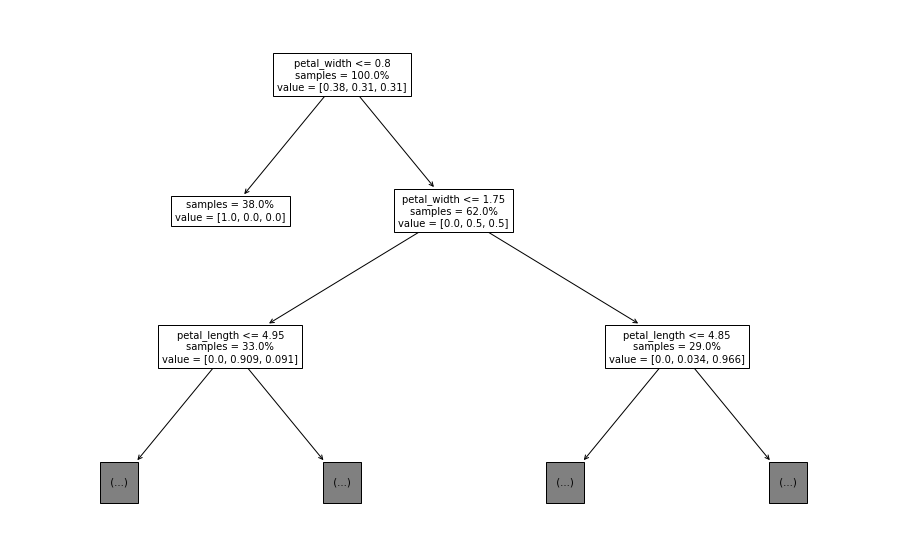

In [16]:
# Decision Tree 시각화
from sklearn import tree
import matplotlib.pyplot as plt

a = tree.plot_tree(dt, feature_names = ['sepal_length','sepal_width','petal_length','petal_width'],impurity=False, max_depth=2, fontsize=10, proportion=True)
plt.show(a)

<strong>Cross Validation</strong>

Cross Validation을 통해 최적의 모델을 평가<br>

In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [18]:
dt = DecisionTreeClassifier(min_samples_split = 10)

In [19]:
scores = cross_val_score(dt, iris[['sepal_length','sepal_width','petal_length','petal_width']], iris['species'], cv=5, scoring="accuracy")
np.mean(scores)

0.9666666666666668